## Ensemble Machine Learning
----
Ensemble machine learning refers to the technique of combining multiple individual machine learning models to make more accurate predictions or classifications. Instead of relying on a single model, ensemble methods leverage the wisdom of the crowd by aggregating predictions from multiple models, often resulting in better performance and increased robustness.

**There are several popular ensemble methods in machine learning, including:**
- Bagging
- Random Forest
- Boosting
- Gradient Boosting
- Stacking

Ensemble methods can improve the accuracy and robustness of machine learning models, especially when individual models have different strengths and weaknesses. They are widely used in various domains and have proven effective in many real-world applications.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [3]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [5]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

In [6]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [7]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svc', SVC(gamma='auto', random_state=42))])

In [8]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, round(accuracy_score(y_test, y_pred)*100), "%")

LogisticRegression 86 %
RandomForestClassifier 87 %
SVC 89 %
VotingClassifier 90 %


### Based on Class Probabilities from each classifier

In [9]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft') # Here voting solf means all the classifiers can estimate class probabilities

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svc',
                              SVC(gamma='auto', probability=True,
                                  random_state=42))],
                 voting='soft')

In [10]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, round(accuracy_score(y_test, y_pred)*100), "%")

LogisticRegression 86 %
RandomForestClassifier 87 %
SVC 89 %
VotingClassifier 91 %


## Bagging Ensemble ML
----
Bagging (Bootstrap Aggregating) is an ensemble machine learning technique that combines multiple individual models trained on different subsets of the training data to make predictions. The main idea behind bagging is to introduce randomness in the training process by creating multiple subsets of the original data through resampling, and training each model on a different subset.

**Here's how the bagging ensemble technique works:**
- **Bootstrap Sampling:** Bagging starts by creating multiple subsets of the training data through bootstrap sampling. Bootstrap sampling involves randomly selecting data points from the original dataset with replacement, which means that some data points may be selected multiple times, while others may not be selected at all. Each subset, also known as a bootstrap sample, has the same size as the original dataset but may differ in terms of the included data points.


- **Model Training:** Once the bootstrap samples are created, an individual model, often referred to as a base model or weak learner, is trained on each bootstrap sample. The base model can be any machine learning algorithm capable of making predictions or classifications. The same algorithm is typically used for each base model, although slight variations can be introduced.
- **Prediction Aggregation:** After training the base models, the bagging ensemble combines their predictions to make the final prediction. The aggregation can be done by averaging the predictions (for regression problems) or by majority voting (for classification problems) from all the base models. Aggregating the predictions helps to reduce the variance and improve the generalization of the ensemble model.

The key benefits of bagging are that it reduces overfitting, increases stability, and can improve prediction accuracy. By training models on different subsets of the data, bagging allows each model to learn from slightly different perspectives, which helps to capture different aspects of the data and reduce the impact of noisy or outlier data points.

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train) #boostrap = True means it is applying Bagging and False means Pasting technique
y_pred = bag_clf.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
print("Accuracy: " + str(round(accuracy_score(y_test, y_pred)*100)) + "%")

Accuracy: 90%


In [13]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("Accuracy: " + str(round(accuracy_score(y_test, y_pred_tree)*100)) + "%")

Accuracy: 86%


***So, here we can see that Bagging performs better than normal Decision Tree***

In [14]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

Text(0.5, 1.0, 'Decision Trees with Bagging')

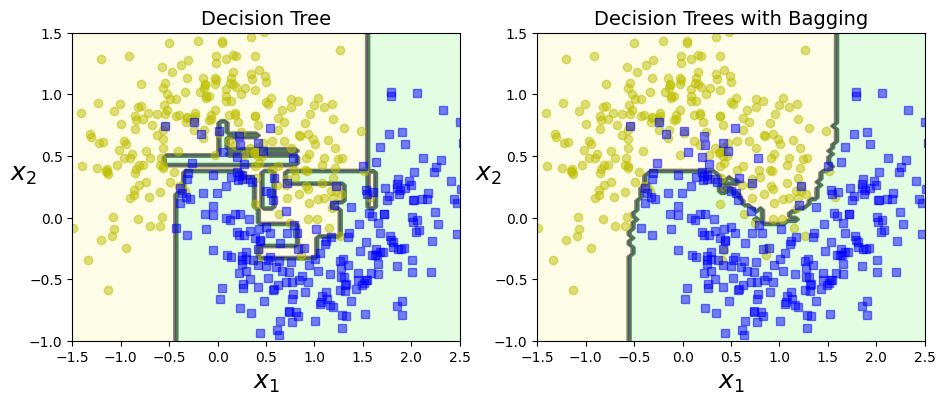

In [15]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)

### Out of Bag Evaluation (Bagging)

In bagging, the out-of-bag (OOB) evaluation is a technique used to estimate the performance of a bagged ensemble model without the need for cross-validation or a separate validation set. It provides a way to assess the model's accuracy by utilizing the samples that were not selected during the training process.

In [16]:
# Create a BaggingClassifier with your base model and desired parameters
bag_clf = BaggingClassifier( DecisionTreeClassifier(), n_estimators=500,
                             bootstrap = True, n_jobs = -1, oob_score = True)

In [17]:
# Train the bagging model
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9013333333333333

In [18]:
# Access the OOB score
oob_score = bag_clf.oob_score_

print("Out of the Bag Score:", round(oob_score*100,2),"%")

Out of the Bag Score: 90.13 %


#### According to the OOB evaluation =, this Bagging Classifier is likely to achive about 89.33% accuracy on the test set. Let's verify this:

In [19]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print("Out of the Bag Score:", round(acc*100,2),"%")

Out of the Bag Score: 92.0 %


##### We get 90.4% which is close enough!

## Random Forests
-----

Random Forest is an ensemble learning method that combines multiple decision trees to create a more robust and accurate model. It is a popular algorithm for both classification and regression tasks.

**Here are the key characteristics and steps involved in the Random Forest algorithm:**

- **Ensemble of Decision Trees:** Random Forest is composed of a collection of decision trees. Each decision tree is built independently using a random subset of the training data.

- **Random Feature Subsets:** For each tree in the Random Forest, a random subset of features is selected as candidates for splitting at each node. This random feature selection helps to decorrelate the trees and reduce overfitting.

- **Bootstrap Aggregating (Bagging):** Each decision tree in the Random Forest is trained on a bootstrap sample of the training data. Bootstrap sampling involves randomly selecting samples from the training data with replacement, allowing some samples to be selected multiple times and others not to be selected at all. This technique creates different training sets for each tree and introduces diversity in the ensemble.

- **Voting or Averaging:** For classification tasks, the Random Forest predicts the class label by majority voting among the individual trees. For regression tasks, the Random Forest predicts the output value by averaging the predictions from all the trees.

- **Out-of-Bag (OOB) Evaluation:** Random Forest provides an OOB evaluation technique. Since each tree is trained on a bootstrap sample, there will be a set of samples (approximately one-third of the data) that are not included in the training of a particular tree. These out-of-bag samples can be used to evaluate the model's performance without the need for a separate validation set.

**Random Forests offer several benefits:**

- Robustness
- Non-linearity
- Feature Importance
- Overfitting Reduction

In [20]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

***Here we used the BaggingClassifier to work it same as Random Forests algorithm using its parameters***

In [21]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.92


In [23]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.912


In [25]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # almost identical predictions

0.976